imports


In [158]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import missingno as msno
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, make_scorer, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.tree import plot_tree


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

read csv

In [159]:
df =  pd.read_csv('diabetes.csv')

check dataset

In [160]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


checking for the null values

In [161]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Getting the summary of the dataset

In [162]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 768    │ │ int64       │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column                 ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancies            │   0 │     0 │   3.845 │   3.37 │     0 │      1 │      3 │      6 │   17 │  ▇▅▃▁  │  │
│ │ Glucose                │   0 │     0 │   120.9 │  31.97 │     0 │     99 │    117 │  140.2 │  199 │   ▅▇▃▂ │  │
│ │ BloodPressure          │   0 │     0 │   69.11 │  19.36 │     0 │     62 │     72 │     80 │  122 │ ▁ ▂▇▃  │  │
│ │ SkinThickness          │   0 │     0 │   20.54 │  15.95 │     0 │      0 │     23 │     32 │   99 │  ▇▇▅   │  │
│ │ Insulin                │   0 │     0 │    79.8 │  115.2 │     0 │      0 │   30.5 │  127.2 │  846 │   ▇▂   │  │
│ │ BMI                    │   0 │     0 │   31.99 │  7.884 │     0 │   27.3 │     32 │   36.6 │ 67.1 │  ▁▇▆▁  │  │
│ │ DiabetesPedigreeFuncti │   0 │     0 │  0.4719 │ 0.3313 │ 0.078 │ 0.2437 │ 0.3725 │ 0.6262 │ 2.42 │  ▇▃▁   │  │
│ │ on                     │     │       │         │        │       │        │        │        │      │        │  │
│ │ Age                    │   0 │     0 │   33.24 │  11.76 │    21 │     24 │     29 │     41 │   81 │  ▇▃▂▁  │  │
│ │ Outcome                │   0 │     0 │   0.349 │  0.477 │     0 │      0 │      0 │      1 │    1 │ ▇    ▅ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

plotting histogram for all the attributes

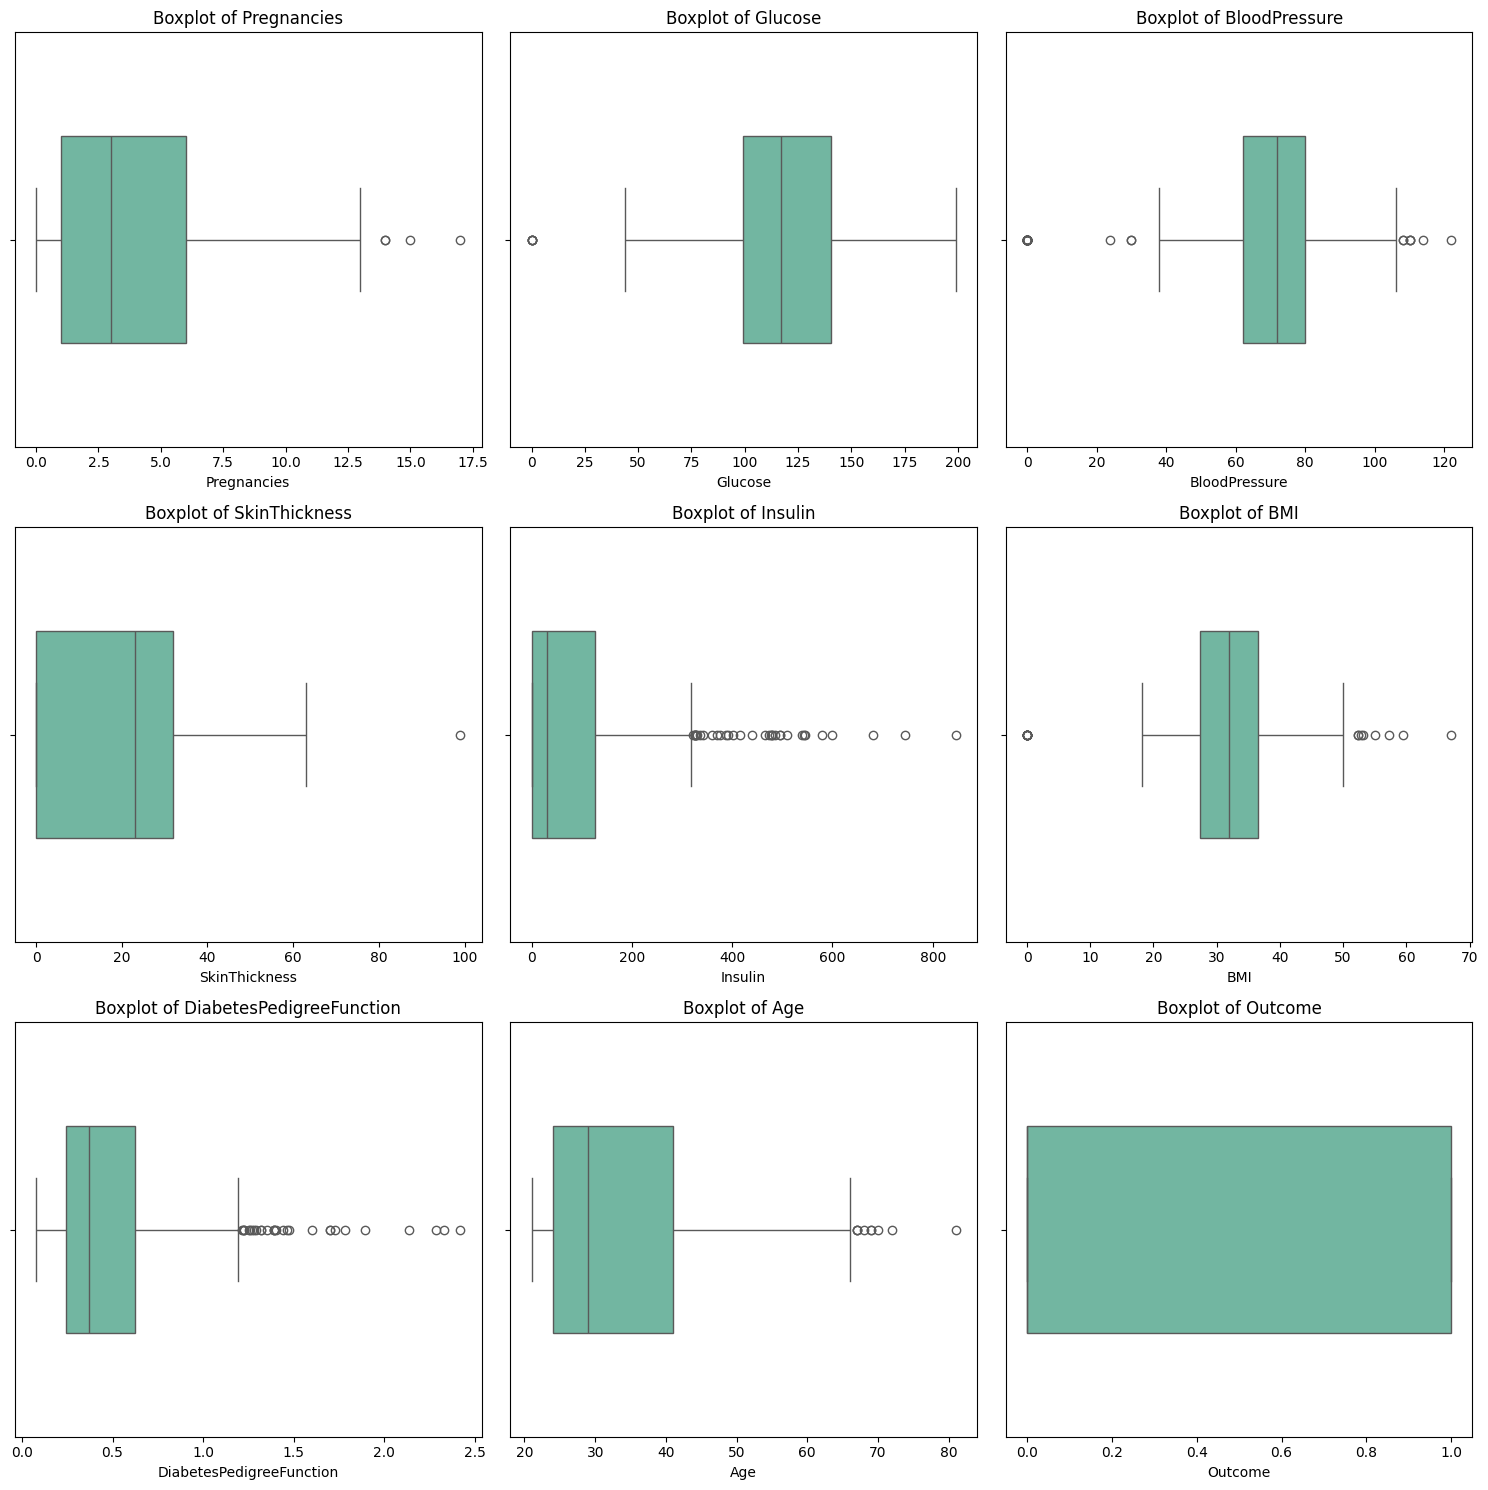

In [163]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5 * n_rows))
axes = axes.flatten() 
for  i , col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i] , palette='Set2', hue=None, width=0.5)
    axes[i].set_title(f'Boxplot of {col}')
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j]) 
    
plt.tight_layout() 

# remove outliers from the whole dataset vith the median values

In [164]:
# remove outliers fron the whole dataset
for col in numeric_cols:
    data = df[col]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Remove outliers with caps and replace them with the median
    df[col] = np.where(data < lower_bound, data.median(), df[col])
    df[col] = np.where(data > upper_bound, data.median(), df[col])
# check the shape of the dataframe after removing outliers

  
df.shape

(768, 9)

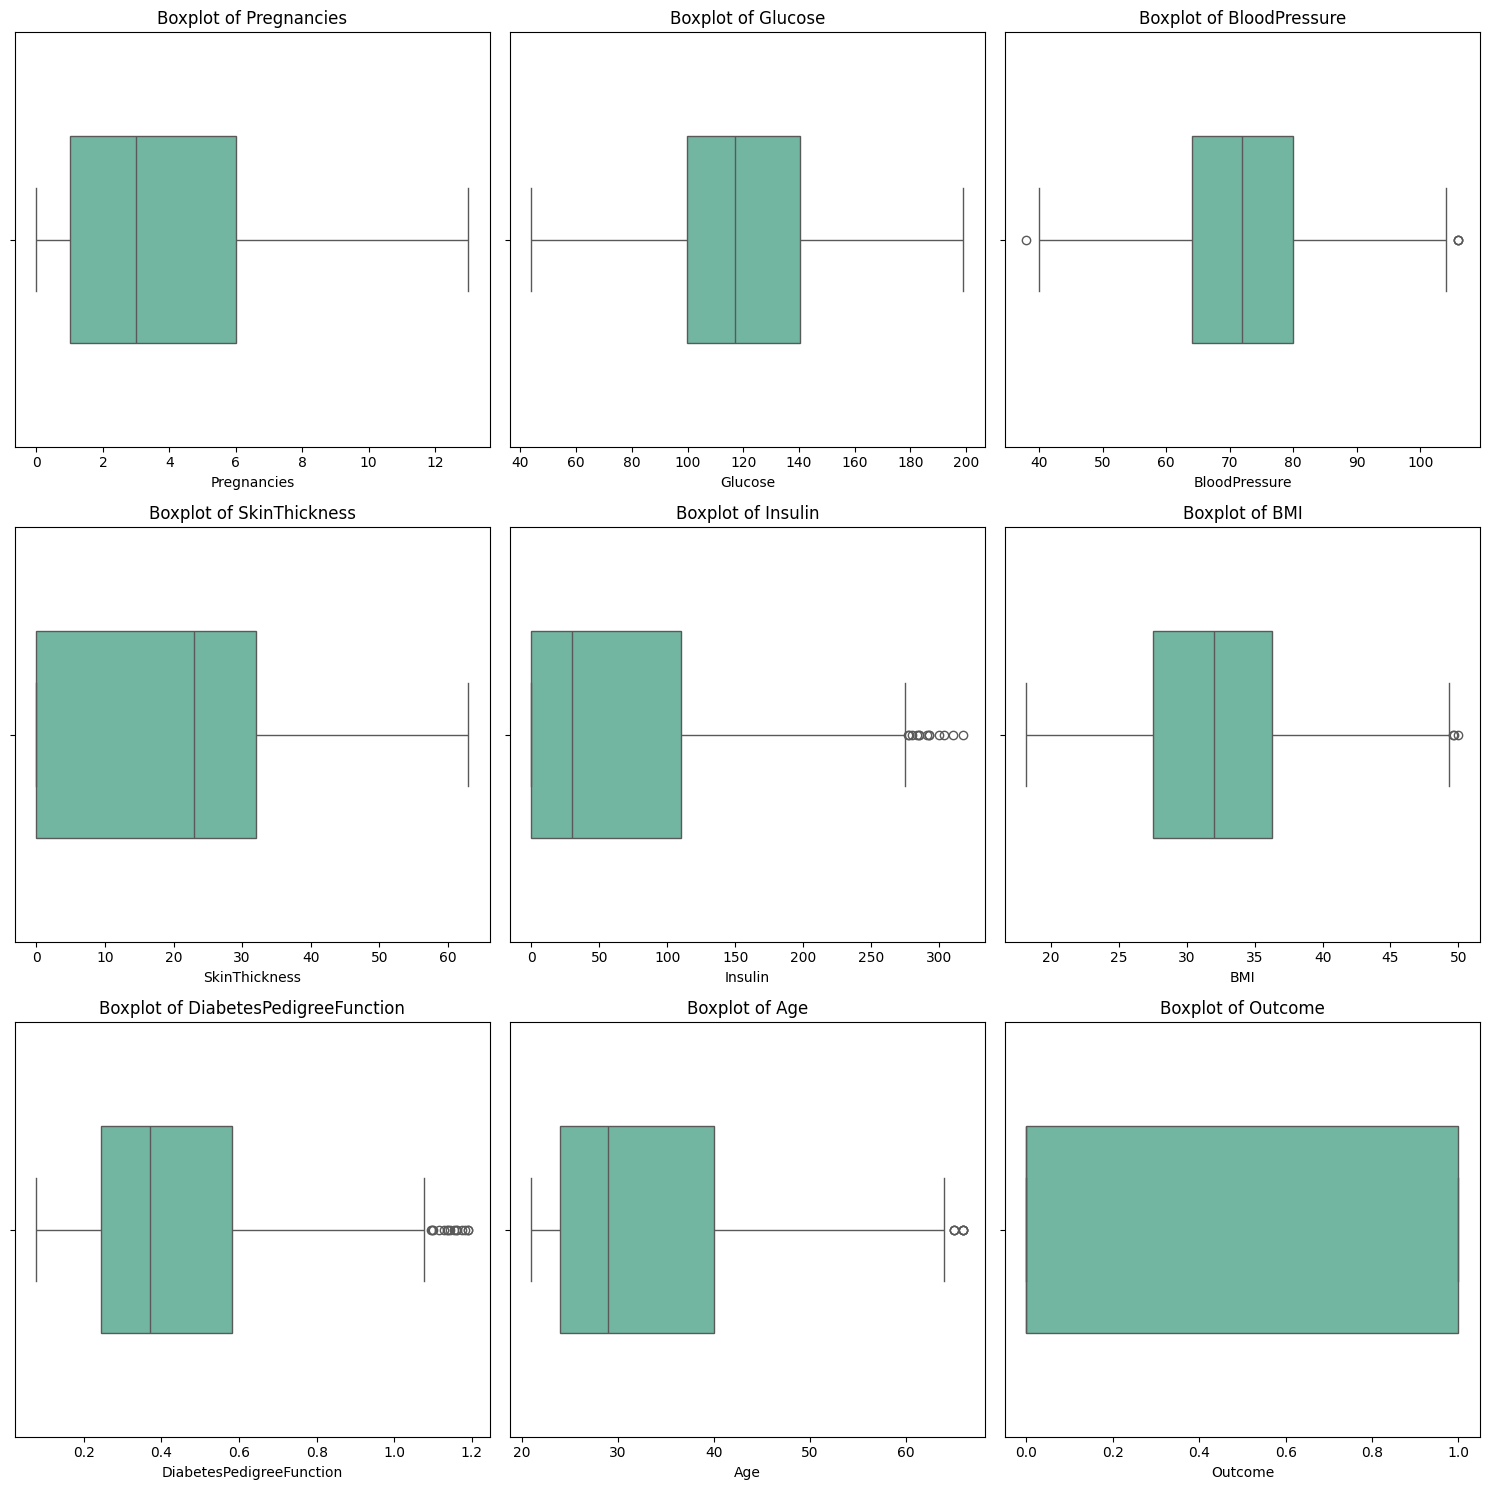

In [165]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5 * n_rows))
axes = axes.flatten() 
for  i , col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i] , palette='Set2', hue=None, width=0.5)
    axes[i].set_title(f'Boxplot of {col}')
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j]) 
    
plt.tight_layout() 

In [166]:
df.shape

(768, 9)

 # plotting correlation matrics

In [167]:
fig = px.imshow(df.corr(), text_auto=True, aspect="auto")
fig.show()

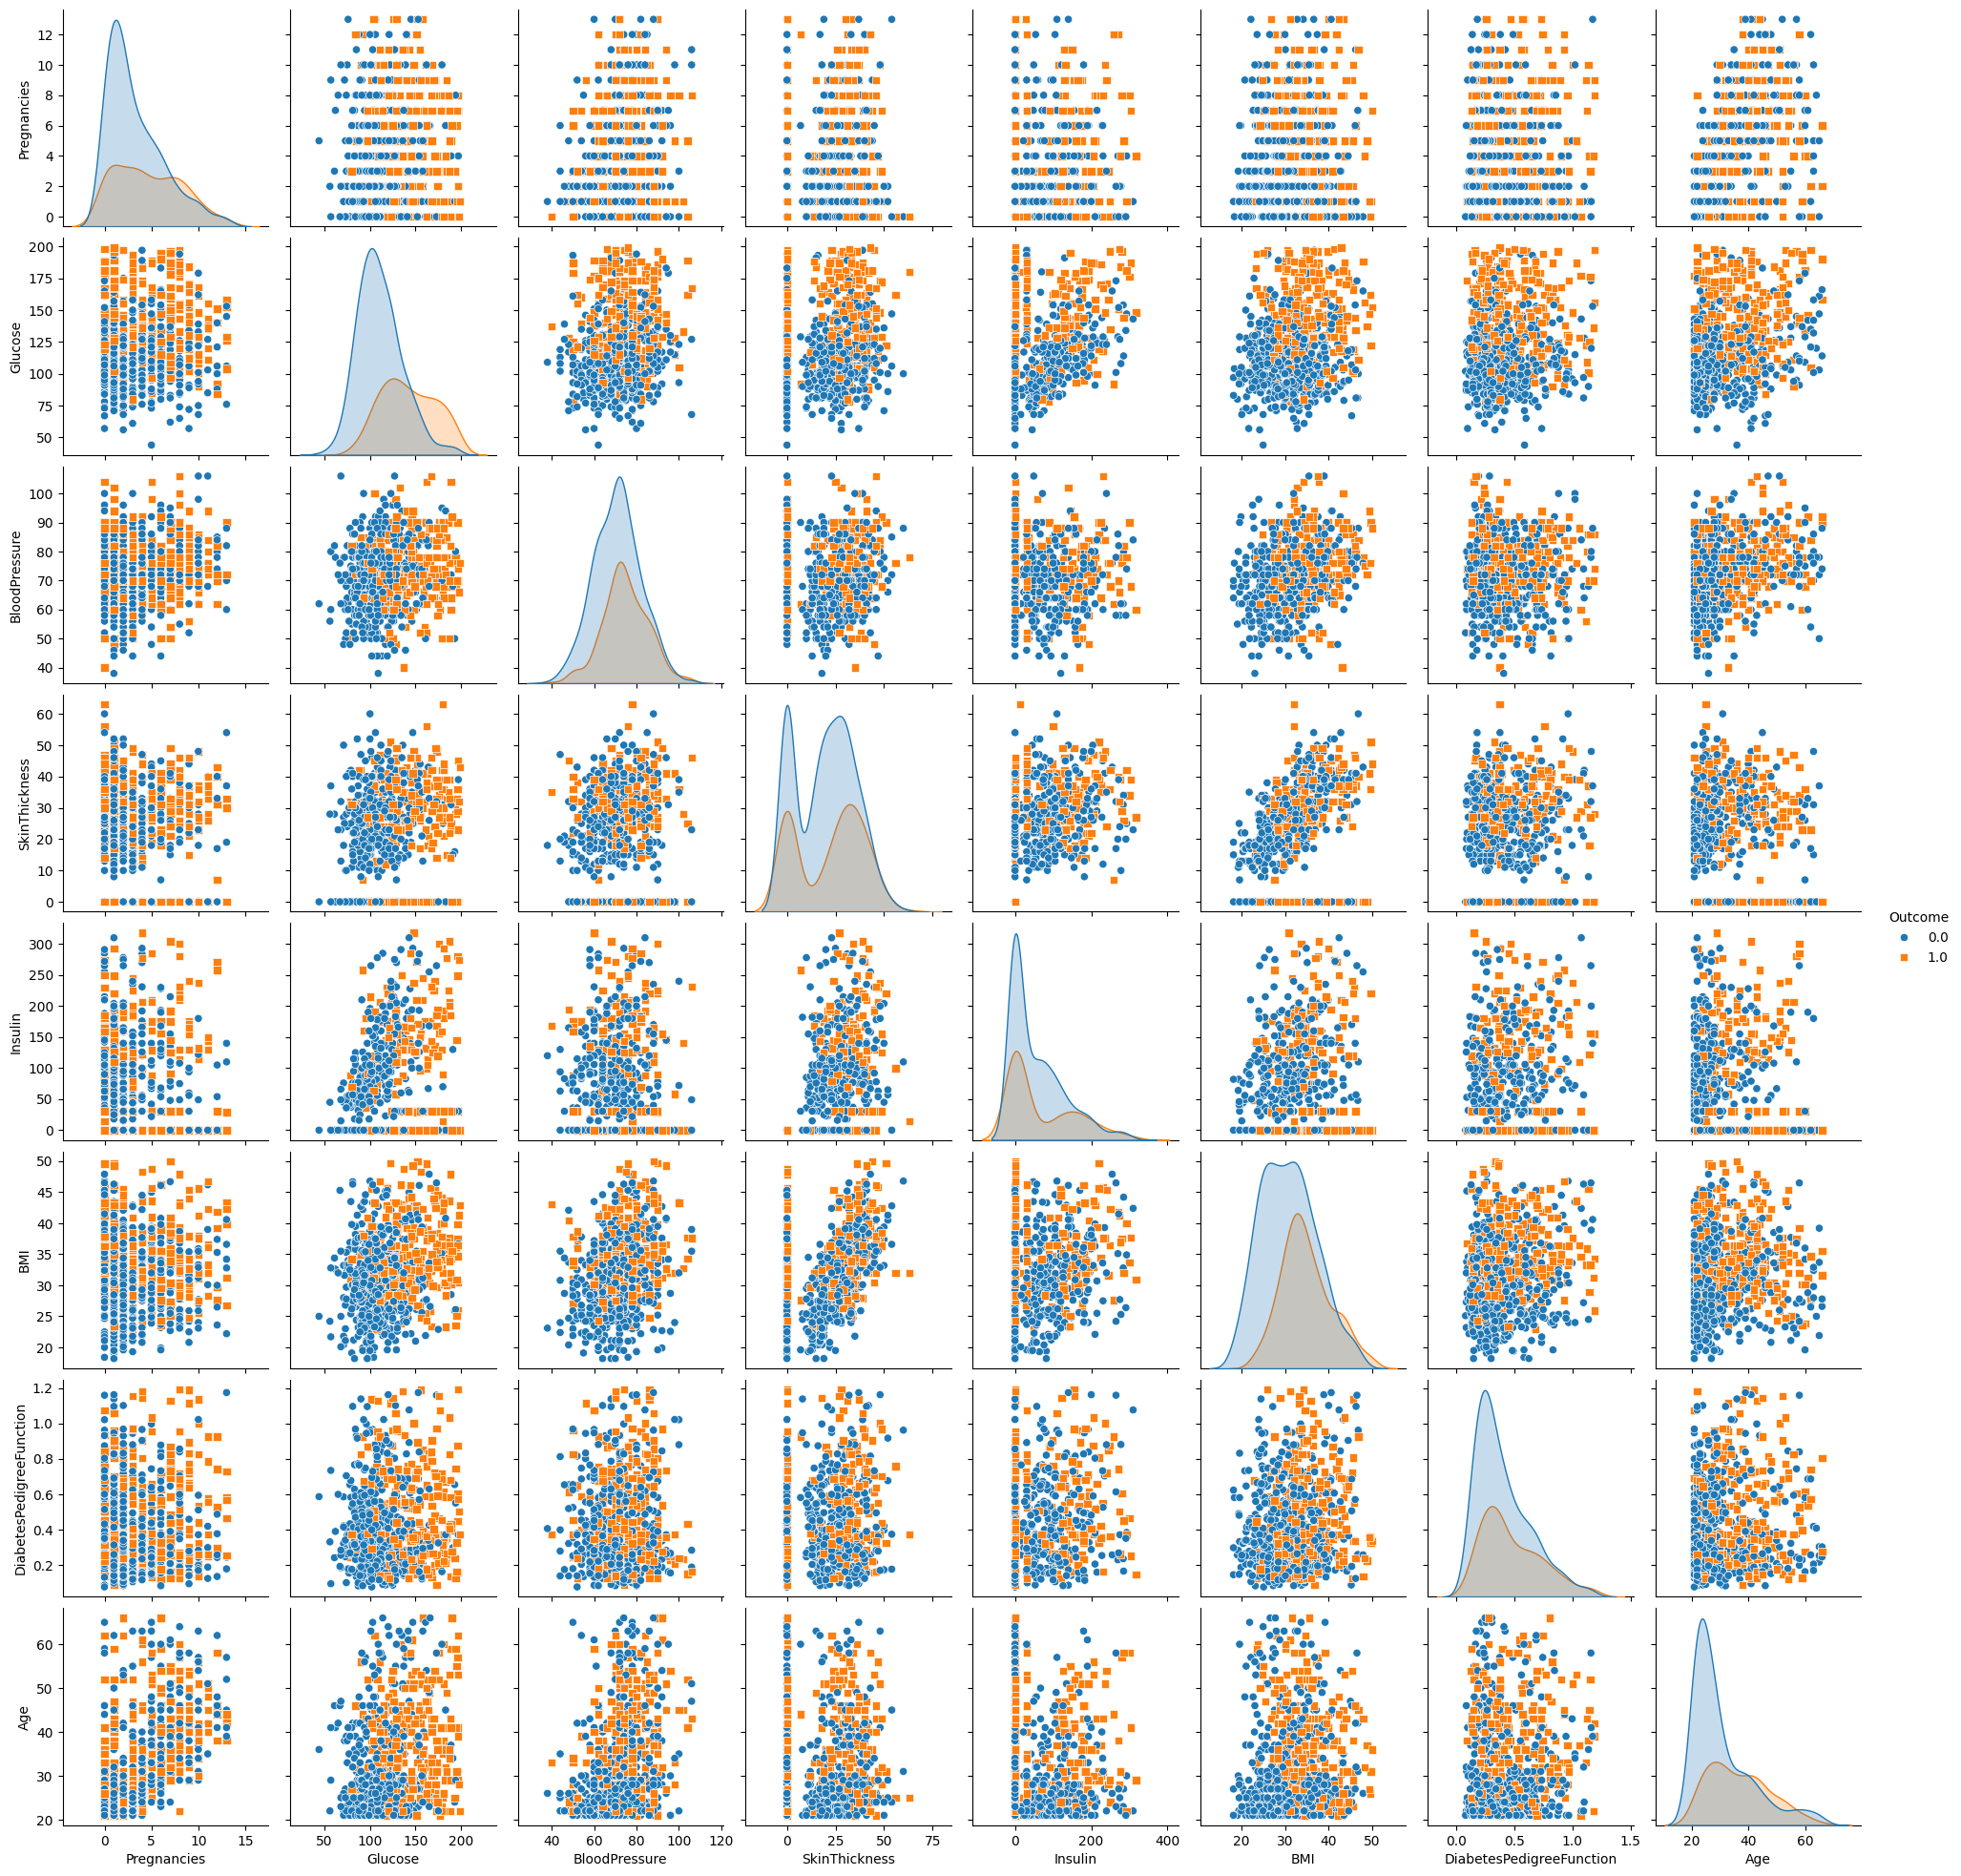

In [168]:
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"], height=2.5)

# check the irregularities in the data

<Axes: >

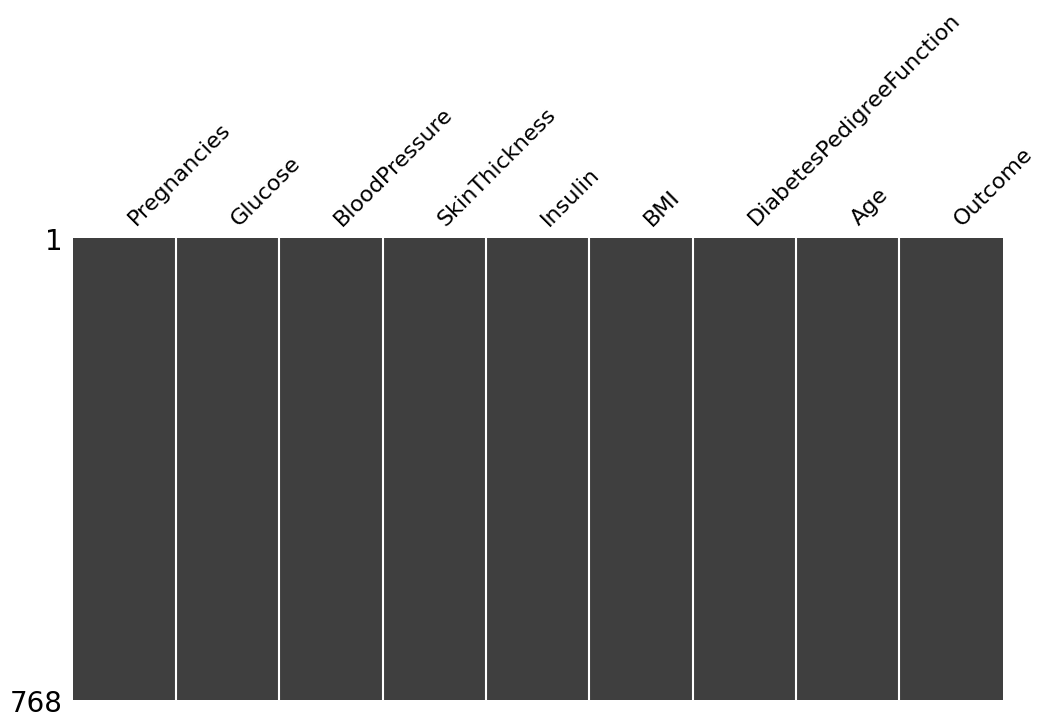

In [169]:

msno.matrix(df, figsize=(12, 6), sparkline=False)

In [170]:
df.values_counts = df['Outcome'].value_counts()
print(df.values_counts)

Outcome
0.0    500
1.0    268
Name: count, dtype: int64


In [171]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.656250,72.196615,20.437500,60.919271,32.198958,0.427667,32.760417,0.348958
std,3.270644,30.438286,11.146723,15.698554,77.635666,6.410558,0.245162,11.055385,0.476951
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.750000,32.000000,0.371750,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,110.000000,36.300000,0.582250,40.000000,1.000000
max,13.000000,199.000000,106.000000,63.000000,318.000000,50.000000,1.191000,66.000000,1.000000


# task 1
Train a Random Forest classifier and a Gaussian Naive Bayes 
model on the diabetes dataset. Compare their default accuracies 
using 5-fold cross-validation.

In [172]:
# split the data into features and target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']


In [173]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# create a preprocessing pipeline

In [174]:
# create a preprocessing pipeline
#random forest classiffier pipeline
rf_pipeline = Pipeline([('scaler', StandardScaler()), 
                        ('model', RandomForestClassifier(random_state=42))])
# Gaussian Naive Bayes pipeline
nb_pipeline = Pipeline([('scaler', StandardScaler()),('model', GaussianNB())])


# evaluate  using 5-fold cross-validation
rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
nb_scores = cross_val_score(nb_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest Classifier Accuracy: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")
print(f"Gaussian Naive Bayes Accuracy: {nb_scores.mean():.4f} ± {nb_scores.std():.4f}")


# fit the models on the training data
rf_pipeline.fit(X_train, y_train)
nb_pipeline.fit(X_train, y_train)


# make predictions on the test data
rf_y_pred = rf_pipeline.predict(X_test)
nb_y_pred = nb_pipeline.predict(X_test)


# evaluate the models
rf_accuracy = accuracy_score(y_test, rf_y_pred)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Random Forest Classifier Test Accuracy: {rf_accuracy:.4f}")
print(f"Gaussian Naive Bayes Test Accuracy: {nb_accuracy:.4f}")




Random Forest Classifier Accuracy: 0.7573 ± 0.0187
Gaussian Naive Bayes Accuracy: 0.7622 ± 0.0166
Random Forest Classifier Test Accuracy: 0.7208
Gaussian Naive Bayes Test Accuracy: 0.7143


In [175]:

# print classification report
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, nb_y_pred))

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79       100
         1.0       0.61      0.56      0.58        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.72      0.72      0.72       154

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       100
         1.0       0.59      0.59      0.59        54

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



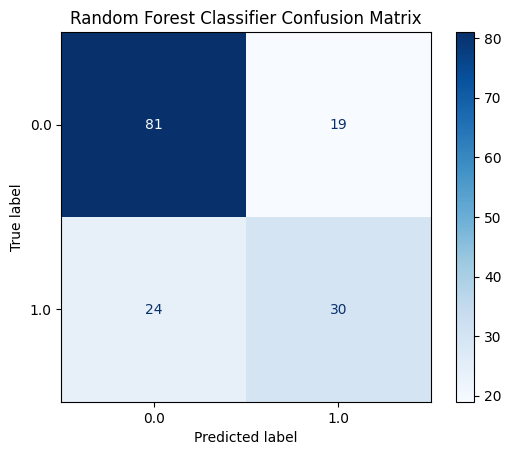

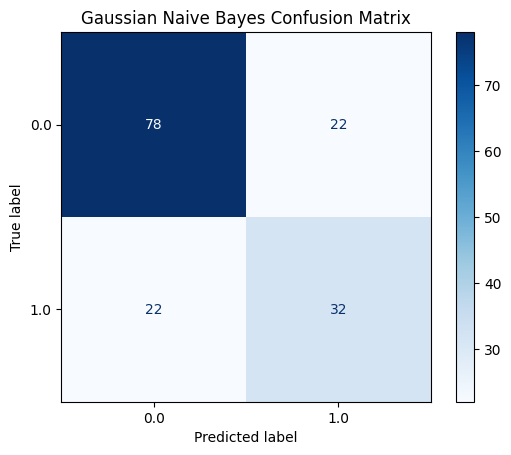

In [176]:
# confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
nb_cm = confusion_matrix(y_test, nb_y_pred)
# plot confusion matrix for Random Forest Classifier
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_pipeline.classes_)
rf_disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()
# plot confusion matrix for Gaussian Naive Bayes
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_pipeline.classes_)
nb_disp.plot(cmap=plt.cm.Blues)
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()


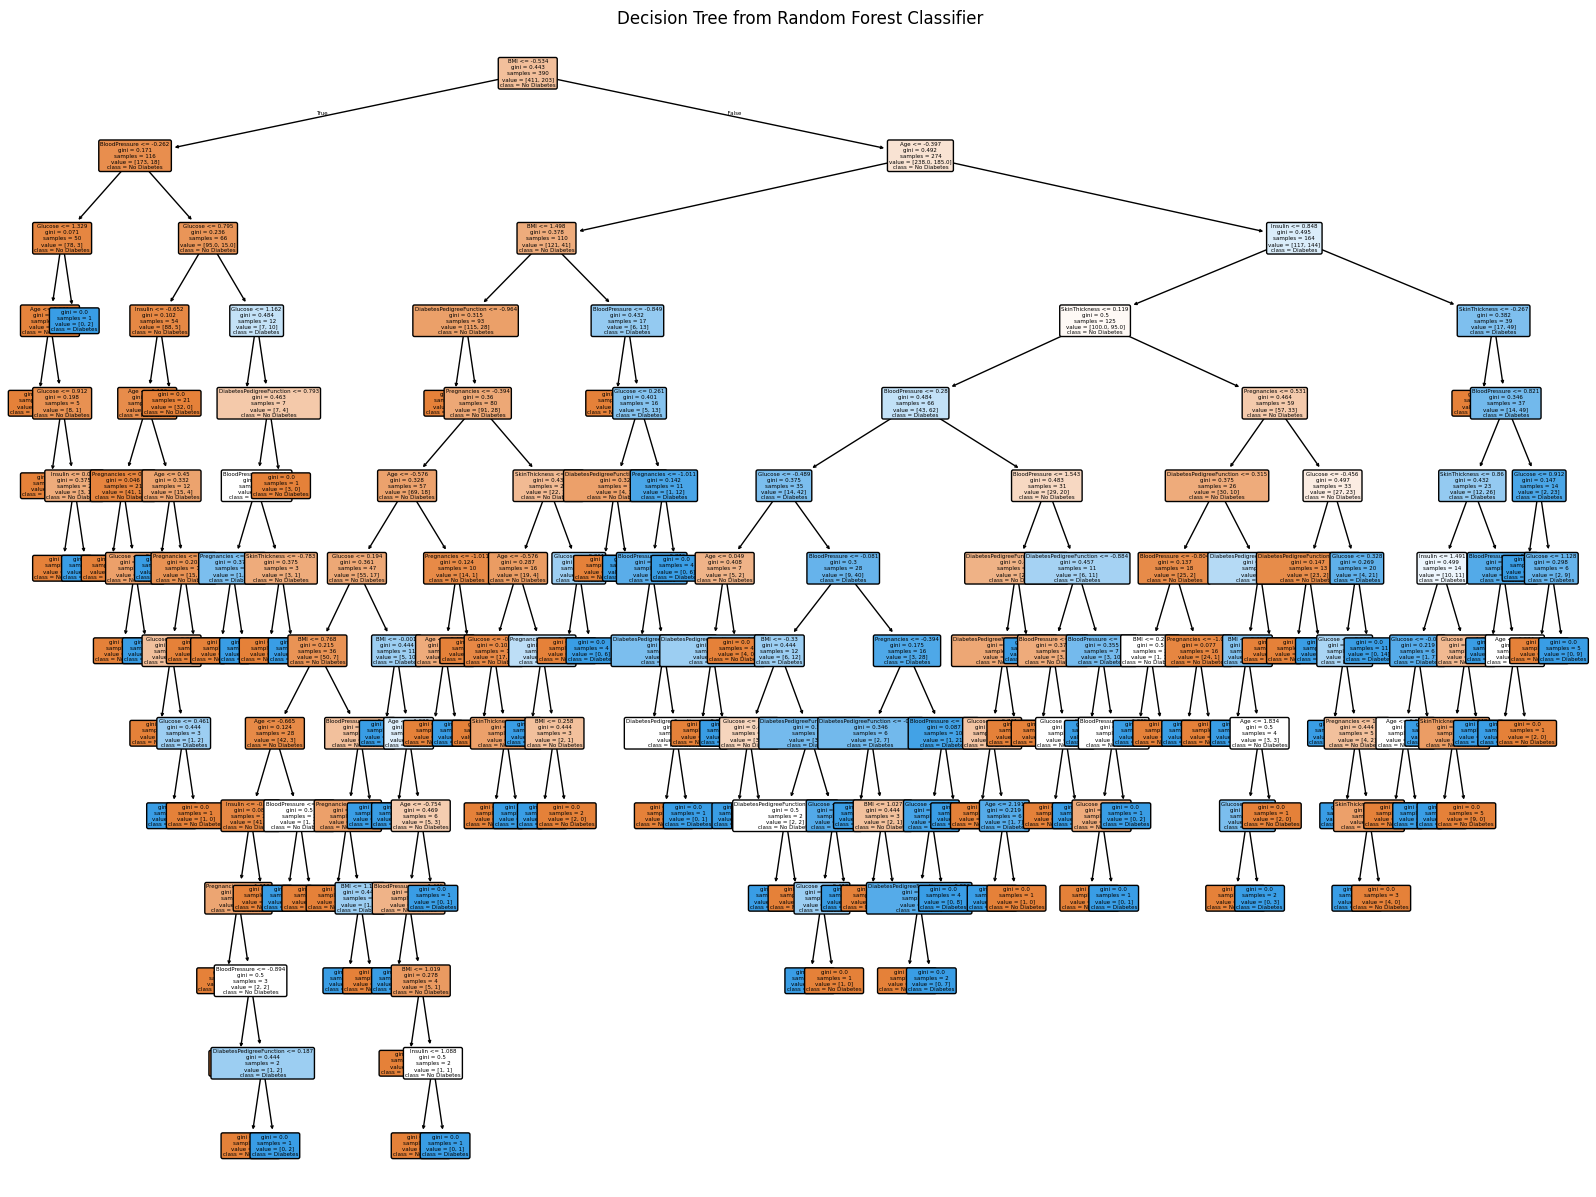

In [177]:
# PLOT A TEREE FOR RANDOM FOREST CLASSIFIER
plt.figure(figsize=(20, 15))
plot_tree(rf_pipeline.named_steps['model'].estimators_[0], 
          feature_names=X.columns, 
          class_names=['No Diabetes', 'Diabetes'], 
          filled=True, 
          rounded=True, fontsize=4)
plt.title("Decision Tree from Random Forest Classifier")
plt.show()


# Task-2 
Identify the top 3 most important features using Random Forest 
and visualize their importance.

In [178]:
importances = rf_pipeline.named_steps['model'].feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [179]:
feat_imp_df

,Feature,Importance
0,Pregnancies,0.084115
1,Glucose,0.289070
2,BloodPressure,0.084480
3,SkinThickness,0.075626
4,Insulin,0.064587
5,BMI,0.158495
6,DiabetesPedigreeFunction,0.119689
7,Age,0.123937


   Feature  Importance
1  Glucose    0.289070
5      BMI    0.158495
7      Age    0.123937


Text(0, 0.5, 'Feature')

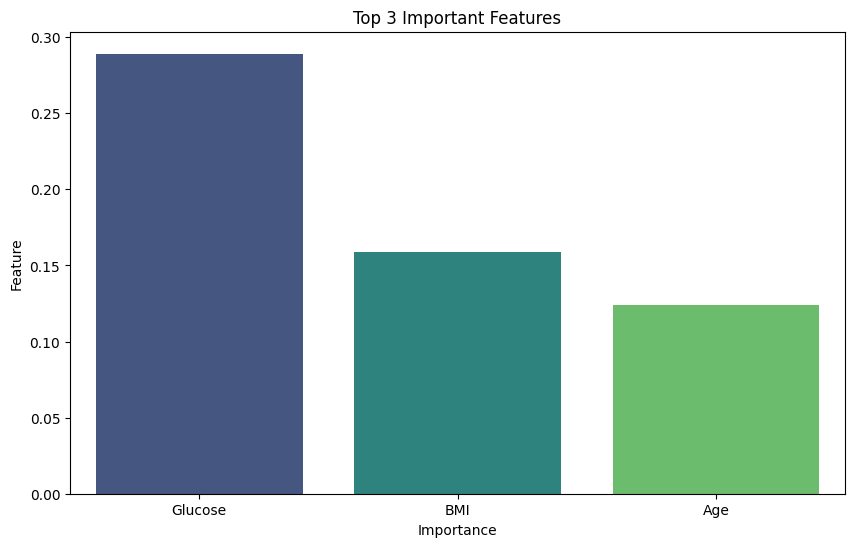

In [180]:
top_3 = feat_imp_df.sort_values(by='Importance', ascending=False).head(3)
print(top_3)
plt.figure(figsize=(10, 6))
sns.barplot(y='Importance', x='Feature', data=top_3, palette='viridis')
plt.title('Top 3 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')


# Task-3 
Use GridSearchCV to  find  the  best  hyperparameters 
(n_estimators, max_depth, min_samples_split) for Random Forest.

In [181]:
progam_grid ={
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    
}

grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=progam_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [182]:
#print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Best Score: 0.7817672930827668


# Task-4 
The diabetes dataset is imbalanced. Modify the Random Forest 
to handle this using class_weight='balanced' and compare results.

In [183]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [184]:
eval_metric(rf_pipeline, X_train, y_train, X_test, y_test,)

Test_Set
[[81 19]
 [24 30]]
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79       100
         1.0       0.61      0.56      0.58        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.72      0.72      0.72       154


Train_Set
[[400   0]
 [  0 214]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [185]:
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('model', rf_balanced)])
rf_balanced_pipeline.fit(X_train, y_train)
rf_balanced_y_pred = rf_balanced_pipeline.predict(X_test)

rf_balaced_cross_val_scores = cross_val_score(rf_balanced_pipeline, X_train, y_train, cv=5, scoring='accuracy') 
print(f"Random Forest Classifier with Balanced Class Weight Cross-Validation Accuracy: {rf_balaced_cross_val_scores.mean():.4f} ± {rf_balaced_cross_val_scores.std():.4f}")


rf_balanced_accuracy = accuracy_score(y_test, rf_balanced_y_pred)
print(f"Random Forest Classifier with Balanced Class Weight Test Accuracy: {rf_balanced_accuracy:.4f}")

Random Forest Classifier with Balanced Class Weight Cross-Validation Accuracy: 0.7427 ± 0.0234
Random Forest Classifier with Balanced Class Weight Test Accuracy: 0.7468


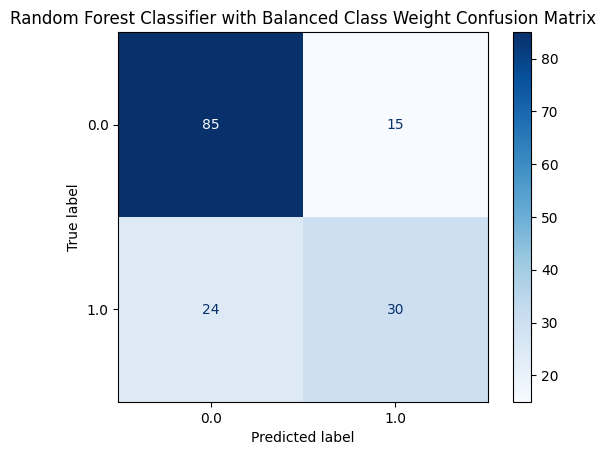

In [186]:
rf_balanced_cm = confusion_matrix(y_test, rf_balanced_y_pred)
rf_balanced_disp = ConfusionMatrixDisplay(confusion_matrix=rf_balanced_cm, display_labels=rf_balanced_pipeline.classes_)
rf_balanced_disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Classifier with Balanced Class Weight Confusion Matrix")
plt.show()

comparision between balanced and unbalanced rf scores

(0.0, 1.0)

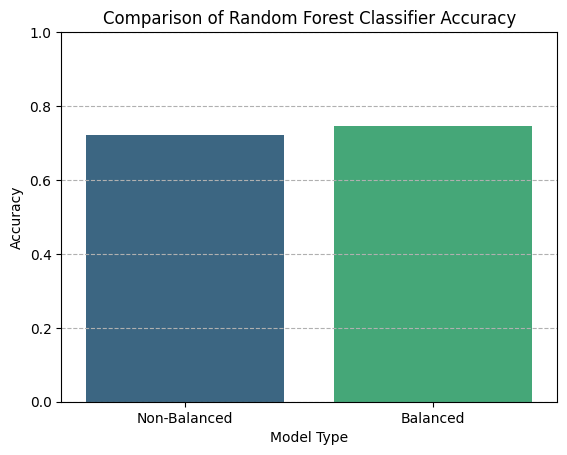

In [187]:
# comparision belwwen balanced vs non-balanced random forest classifier
sns.barplot(x=['Non-Balanced', 'Balanced'], y=[rf_accuracy, rf_balanced_accuracy], palette='viridis')
plt.title('Comparison of Random Forest Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model Type')
plt.grid(axis='y', linestyle='--')
plt.ylim(0, 1)




# Task-5 
Combine Random Forest and Naive Bayes predictions using 
a voting  classifier and  compare  its  performance  with 
individual models.

In [188]:
from sklearn.ensemble import VotingClassifier

# create a voting classifier with Random Forest and Gaussian Naive Bayes
voting_clf = VotingClassifier(
    estimators=[('rf', rf_pipeline), 
                ('nb', nb_pipeline)], 
    
    voting='soft')


# fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)


# make predictions on the test data
voting_y_pred = voting_clf.predict(X_test)


Voting Classifier Test Accuracy: 0.6883


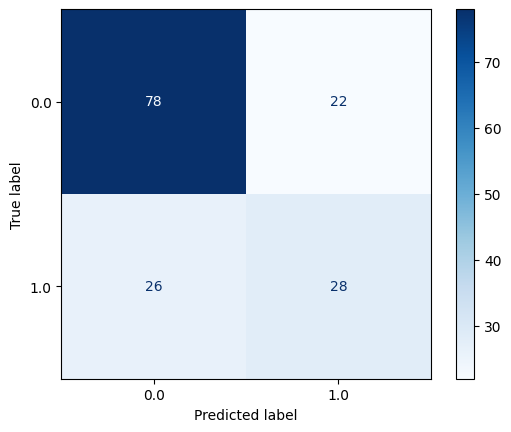

In [189]:

voting_accuracy = accuracy_score(y_test, voting_y_pred)
print(f"Voting Classifier Test Accuracy: {voting_accuracy:.4f}")
voting_cm = confusion_matrix(y_test, voting_y_pred)
voting_disp = ConfusionMatrixDisplay(confusion_matrix=voting_cm, display_labels=voting_clf.classes_)
voting_disp.plot(cmap=plt.cm.Blues)

(0.0, 1.0)

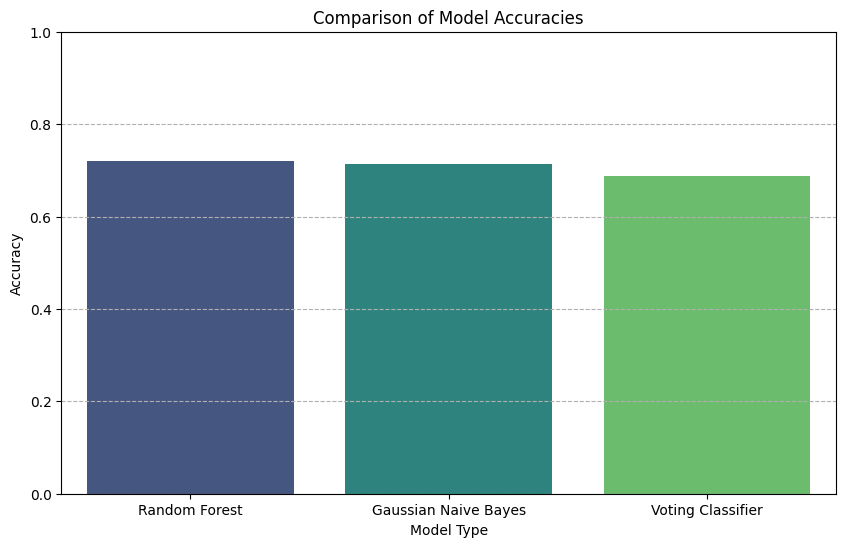

In [190]:
# COMPARISON OF VOTING CLASSIFIER WITH OTHER MODELS
plt.figure(figsize=(10, 6))
sns.barplot(x=['Random Forest', 'Gaussian Naive Bayes', 'Voting Classifier'], 
            y=[rf_accuracy, nb_accuracy, voting_accuracy], palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model Type')
plt.grid(axis='y', linestyle='--')
plt.ylim(0, 1)
